In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [10]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df_GCD = pd.DataFrame(ground_cricket_data)
df_GCD.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# # 1. Find the linear regression equation for this data.

In [51]:
# Tasks, Part 1
X = df[["Ground Temperature"]]
Y = df["Chirps/Second"]
       

In [40]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.9326673171731272


# # 2. Chart the original data and the equation on the chart.

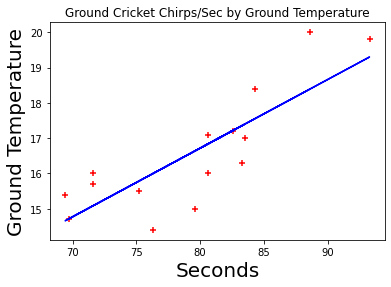

In [52]:
# Chart the original data and the equation on the chart.
%matplotlib inline 
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel("Seconds" , fontsize=20)
plt.ylabel("Ground Temperature" , fontsize=20)
plt.scatter(X,Y,color="red",marker="+")
plt.plot(X,model.predict(X),color="blue")

# # 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [41]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.9326673171731272


# # 4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [48]:
print('At 95˚F, our approximation of chirps/sec is: {:.4f}'.format(model.predict([[95]])[0]))

At 95˚F, our approximation of chirps/sec is: 19.6289


C:\Users\MOHANRAJ\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# # 5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [53]:
def chirps_to_temp(y):
    ret = (y - model.intercept_) / model.coef_[0]
    print('With an observation of {} chirps/sec, ''we expect a ground temp of {:.2f}˚F'.format(y, ret))
    
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.61˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [54]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


# # 1. Find the linear regression equation for this data for brain weight to body weight.

In [55]:
# Tasks, Part 1
X = df[["Brain"]]
Y = df.Body

In [67]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.8343819744699484


# # 2. Chart the original data and the equation on the chart.

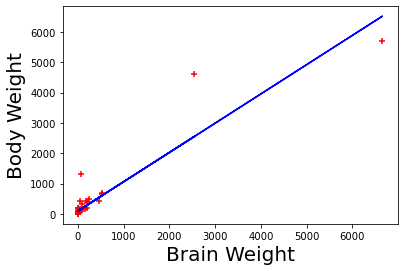

In [69]:
# Chart the original data and the equation on the chart.
%matplotlib inline 
plt.xlabel("Brain Weight" , fontsize=20)
plt.ylabel("Body Weight" , fontsize=20)
plt.scatter(X,Y,color="red",marker="+")
plt.plot(X,model.predict(X),color="blue")

# # 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [70]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)
print("This score is greater than 0.8, so it is a good fit for this data.")

The models scores is :  0.8343819744699484
This score is greater than 0.8, so it is a good fit for this data.


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [72]:
df1 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df1.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


# # 1. Find the linear regression equation for this data using columns 1-5 to column 6.

# # Column Sex

Text(0, 0.5, 'Salary')

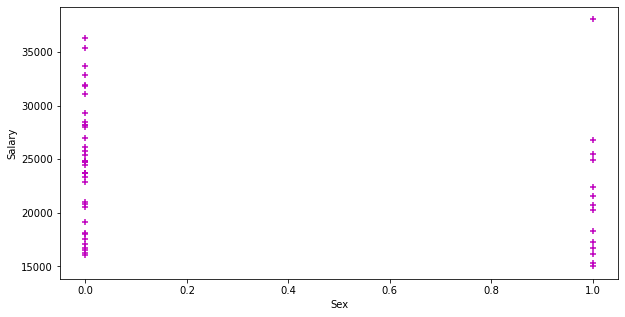

In [181]:
# Column 1 Sex

X1 = df1[["Sex"]]
Y1 = df1.Salary

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X1 , Y1 ,c='m',marker = '+')

# Defining Title and X and Y Axis
plt.xlabel ("Sex")
plt.ylabel ("Salary")

In [206]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.26205532008370114


In [207]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.26205532008370114


# # Column Rank

Text(0, 0.5, 'Salary')

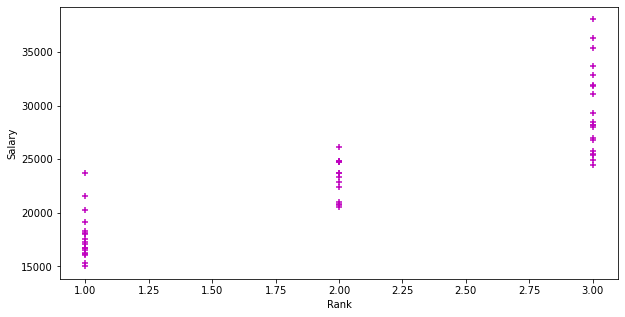

In [40]:
# Column 2 Rank

X2 = df1[["Rank"]]
Y2 = df1.Salary

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X2 , Y2 ,c='m',marker = '+')

# Defining Title and X and Y Axis
plt.xlabel ("Rank")
plt.ylabel ("Salary")

In [46]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X2,Y2,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.8666756862669069


In [47]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.8666756862669069


# # Column Year

Text(0, 0.5, 'Salary')

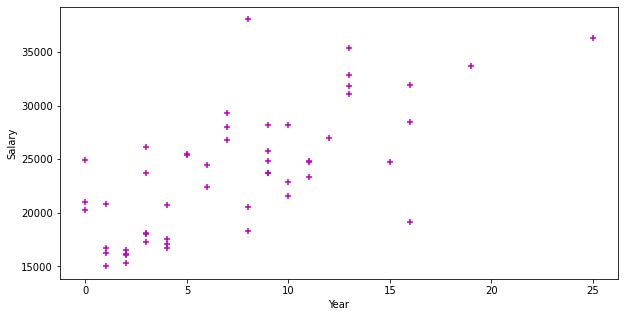

In [64]:
# Column 3 Year

X3 = df1[["Year"]]
Y3 = df1.Salary

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X3 , Y3 ,c='m',marker = '+')

# Defining Title and X and Y Axis
plt.xlabel ("Year")
plt.ylabel ("Salary")

In [62]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X3,Y3,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.8509348127256883


In [63]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.8509348127256883


# # Column Degeree

Text(0, 0.5, 'Salary')

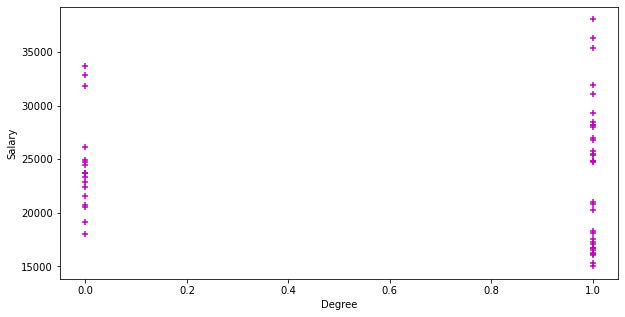

In [149]:
# Column 4 Degree

X4 = df1[["Degree"]]
Y4 = df1.Salary

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X4 , Y4 ,c='m',marker = '+')

# Defining Title and X and Y Axis
plt.xlabel ("Degree")
plt.ylabel ("Salary")

In [178]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X4,Y4,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.003973480424675047


In [179]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.003973480424675047


# # Column YSdeg

Text(0, 0.5, 'Salary')

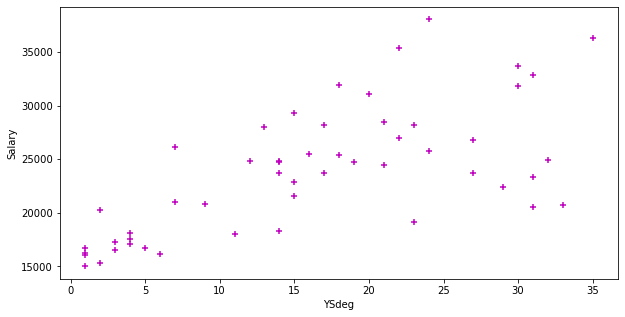

In [87]:
# Column 5 YSdeg

X5 = df1[["YSdeg"]]
Y5 = df1.Salary

# Config Size
plt.figure(figsize = (10,5))
plt.scatter(X5 , Y5 ,c='m',marker = '+')

# Defining Title and X and Y Axis
plt.xlabel ("YSdeg")
plt.ylabel ("Salary")

In [116]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X5,Y5,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.8060686726262491


In [117]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.8060686726262491


# # 2. Find the selection of columns with the best $R^2$ score.

# # All the Columns that give a good r2 score

In [137]:
# Column that give a good r2 score
X6 = df1[["YSdeg","Year","Rank"]]
Y6 = df1.Salary

In [147]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X6,Y6,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test))

The models scores is : 0.9177087419425985


In [148]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2)

The models scores is :  0.9177087419425985



# # The R2 Model Scores:

 # Column Sex          : 0.26205532008370114
 # Column Rank        : 0.8666756862669069
 # Column Year          : 0.8509348127256883
 # Column Degeree   : 0.003973480424675047
 # Column YSdeg      :  0.8060686726262491
 
# # The Good R2 Model Scores: (Rank,Year,YSdeg)
 
 # The Combination of the good score column is : 0.9177087419425985


# # 3. Report whether sex is a factor in salary.

# # The R2 Model Score of column Sex is  0.26205532008370114 which is less than 0.8 hence it is not a factor for predict Salary.

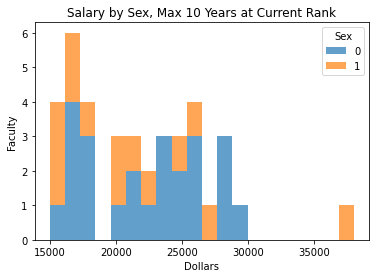

In [75]:
# We can view another aspect also

# Salary by Sex, Max 10 Years at Current Rank
df1_10 = df1[df1['Year'] <= 10]

df1_10.pivot_table(index=df1_10.index, columns='Sex', values='Salary') .plot(kind='hist', alpha=0.7, stacked=True, bins=20,title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

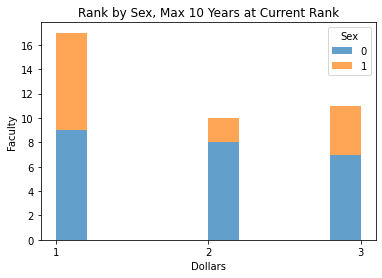

In [78]:
# Rank by Sex, Max 10 Years at Current Rank
df1_10.pivot_table(index=df1_10.index, columns='Sex', values='Rank').plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [83]:
# Over all model scores 

import itertools as it

def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, df1_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279377, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037699, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759161, ('Sex', 'YSdeg')),
 (0.4848731472423392, ('Year', 'YSdeg')),
 (0.48257642674080214, ('YSdeg',)),
 (0.17754355818252254, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.17613062148611913, ('Year', 'Degree')),
 (0.17502353196257237, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012367, ('Sex',)),
 (0.0036042103162726713, ('Degree',))]

# #There is no salary discrimination by Sex.